In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
from numpy import trapz
import os
import glob

### Comparing ASM, LGB, RF and PingUMIL in a Train-Test Split Scenario

asm_sg3f 59.12674741264933
asm_sg3f_clusterd 40.647869180026326
asm_sg3f__kmeansk5 40.964913313840455
lgb_sg3f 59.295017460537224
lgb_sg3f 62.575946162148725
lgb_sg3f 63.07352450950907
lgb_sg3f 64.64250348094713
lgb_sg3f_csf 52.3196064770637
lgb_sg3f_csf 59.171188694675216
lgb_sg3f_csf 62.537566030359685
lgb_sg3f_csf 64.32338813622894
lgb_sg3f_csf 66.06272579412826
lgb_sg3f_csf 66.17988994099025
lr_sg3f 55.15451863008982
lr_sg3f 55.721443611403835
rf_sg3f 65.2552533452413
rf2_sg3f 66.52269205262995
rf2_sg3f_csf 67.59941238344258
rf2_sg3f_csf 67.89871804186653


<AxesSubplot:xlabel='timestamp'>

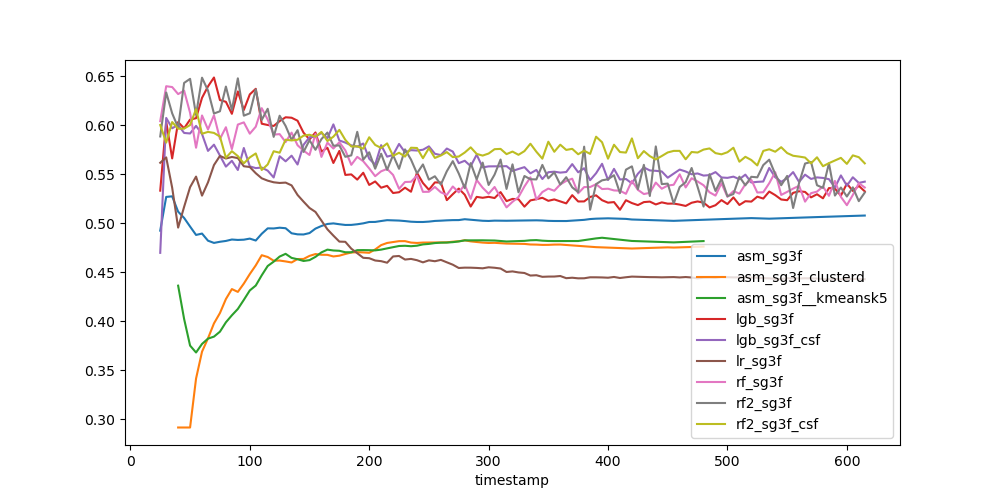

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}


In [4]:
result_dict = {}
input_files = ["asm_sg3f.csv", "asm_sg3f_clusterd.csv", "asm_sg3f__kmeansk5.csv","lgb_sg3f.csv", "lgb_sg3f_csf.csv", "lr_sg3f.csv", "lr_sg3f_csf.csv", "rf_sg3f.csv", "rf_sg3f_csf.csv", "rf2_sg3f.csv", "rf2_sg3f_csf.csv"]
for input_file in input_files:
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    #print(exp_df)
    model_name = input_file.split(".")[0]
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            print(model_name, curve_area)
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
    result_df = pd.DataFrame.from_dict(result_dict)
#print(result_df)
result_df.plot.line(figsize=(10,5))

In [5]:
exp_log_path = "/raid/home/smelo/PingUMiL-pytorch/experiment_log/winpred_winpred_binary_activity_gs_macro_high_cls_epochs_10foldval"
files = glob.glob(exp_log_path+"/*/*.txt", recursive=True)
exp_dict = {"timestamp" : [], "f1_test" : []}
print(len(files))
for file in files:
    folder = os.path.dirname(file)
    if not os.path.exists(file) or not os.path.exists(f"{folder}/results.csv"):
        continue
    with open(file) as fp:
        for line in fp:
            if "f1_avg" in line:
                exp_dict["f1_test"].append(float(line.split(" ")[-1]))
                break
    timestamp_df = pd.read_csv(f"{folder}/results.csv")
    exp_dict["timestamp"].append(timestamp_df["timestamp"].values[0])
exp_df = pd.DataFrame.from_dict(exp_dict).sort_values(by="timestamp").rename(columns={"f1_test" : "Ours"}).set_index("timestamp")
final_df = result_df.merge(exp_df, on="timestamp")
print(result_df)
print(exp_df)


120
           asm_sg3f  asm_sg3f_clusterd  asm_sg3f__kmeansk5  lgb_sg3f  \
timestamp                                                              
25.0       0.492540                NaN                 NaN  0.533402   
30.0       0.527004                NaN                 NaN  0.603911   
35.0       0.527626                NaN                 NaN  0.566339   
40.0       0.511939           0.291534            0.436379  0.603471   
45.0       0.505535           0.291534            0.402370  0.597093   
...             ...                ...                 ...       ...   
595.0      0.507216                NaN                 NaN  0.528278   
600.0      0.507412                NaN                 NaN  0.540598   
605.0      0.507607                NaN                 NaN  0.533140   
610.0      0.507802                NaN                 NaN  0.538324   
615.0      0.507995                NaN                 NaN  0.532681   

           lgb_sg3f_csf   lr_sg3f   rf_sg3f  rf2_sg3f  rf2_

<AxesSubplot:xlabel='timestamp'>

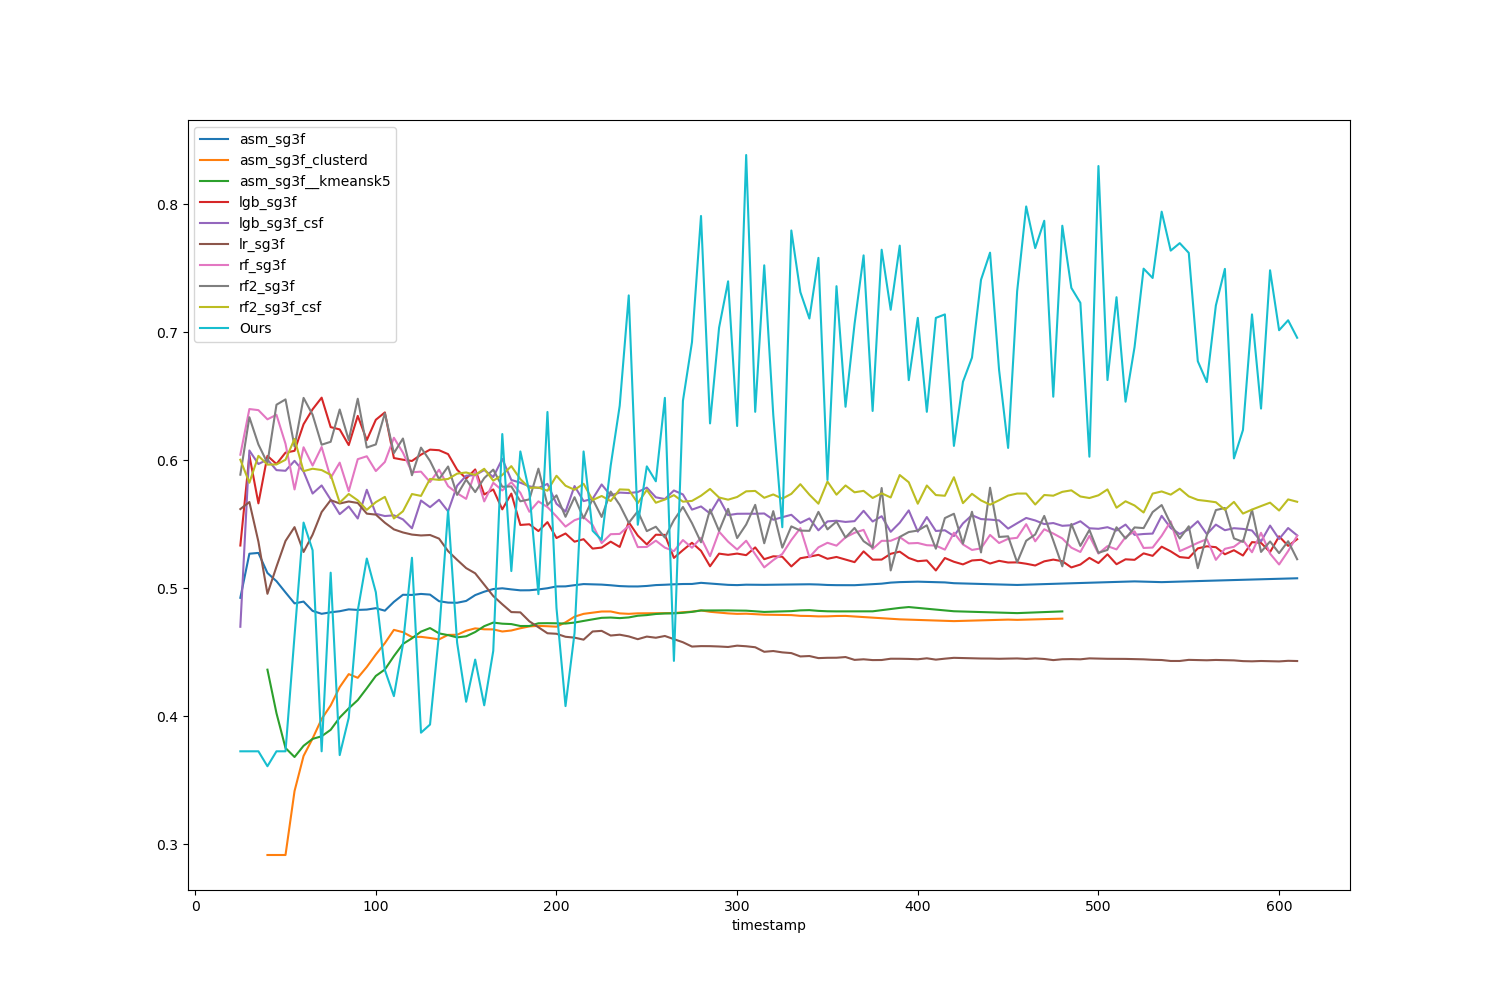

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.2000000476837158, 'type': 'set_device_pixel_ratio'}


In [6]:
final_df.plot.line(figsize=(15,10))

### Comparing methods in a 10-fold cv scenario
Data is partitioned in
8 - train
1 - validation
1 - test

In [7]:
exp_log_path = "/raid/home/smelo/PingUMiL-pytorch/experiment_log/winpred_winpred_binary_activity_gs_macro_high_cls_epochs_10foldval_811"
files = glob.glob(exp_log_path+"/*/*.txt", recursive=True)
exp_dict = {"timestamp" : [], "f1_test" : []}
print(len(files))
for file in files:
    folder = os.path.dirname(file)
    with open(file) as fp:
        for line in fp:
            if "f1" in line:
                exp_dict["f1_test"].append(float(line.split(" ")[-1]))
            if "timestamp" in line:
                exp_dict["timestamp"].append(int(line.split(" ")[-1]))
exp_df = pd.DataFrame.from_dict(exp_dict).sort_values(by="timestamp").rename(columns={"f1_test" : "Ours_811"}).set_index("timestamp")
final_df = final_df.merge(exp_df, on="timestamp")
print(result_df)
print(exp_df)


82
           asm_sg3f  asm_sg3f_clusterd  asm_sg3f__kmeansk5  lgb_sg3f  \
timestamp                                                              
25.0       0.492540                NaN                 NaN  0.533402   
30.0       0.527004                NaN                 NaN  0.603911   
35.0       0.527626                NaN                 NaN  0.566339   
40.0       0.511939           0.291534            0.436379  0.603471   
45.0       0.505535           0.291534            0.402370  0.597093   
...             ...                ...                 ...       ...   
595.0      0.507216                NaN                 NaN  0.528278   
600.0      0.507412                NaN                 NaN  0.540598   
605.0      0.507607                NaN                 NaN  0.533140   
610.0      0.507802                NaN                 NaN  0.538324   
615.0      0.507995                NaN                 NaN  0.532681   

           lgb_sg3f_csf   lr_sg3f   rf_sg3f  rf2_sg3f  rf2_s

<AxesSubplot:xlabel='timestamp'>

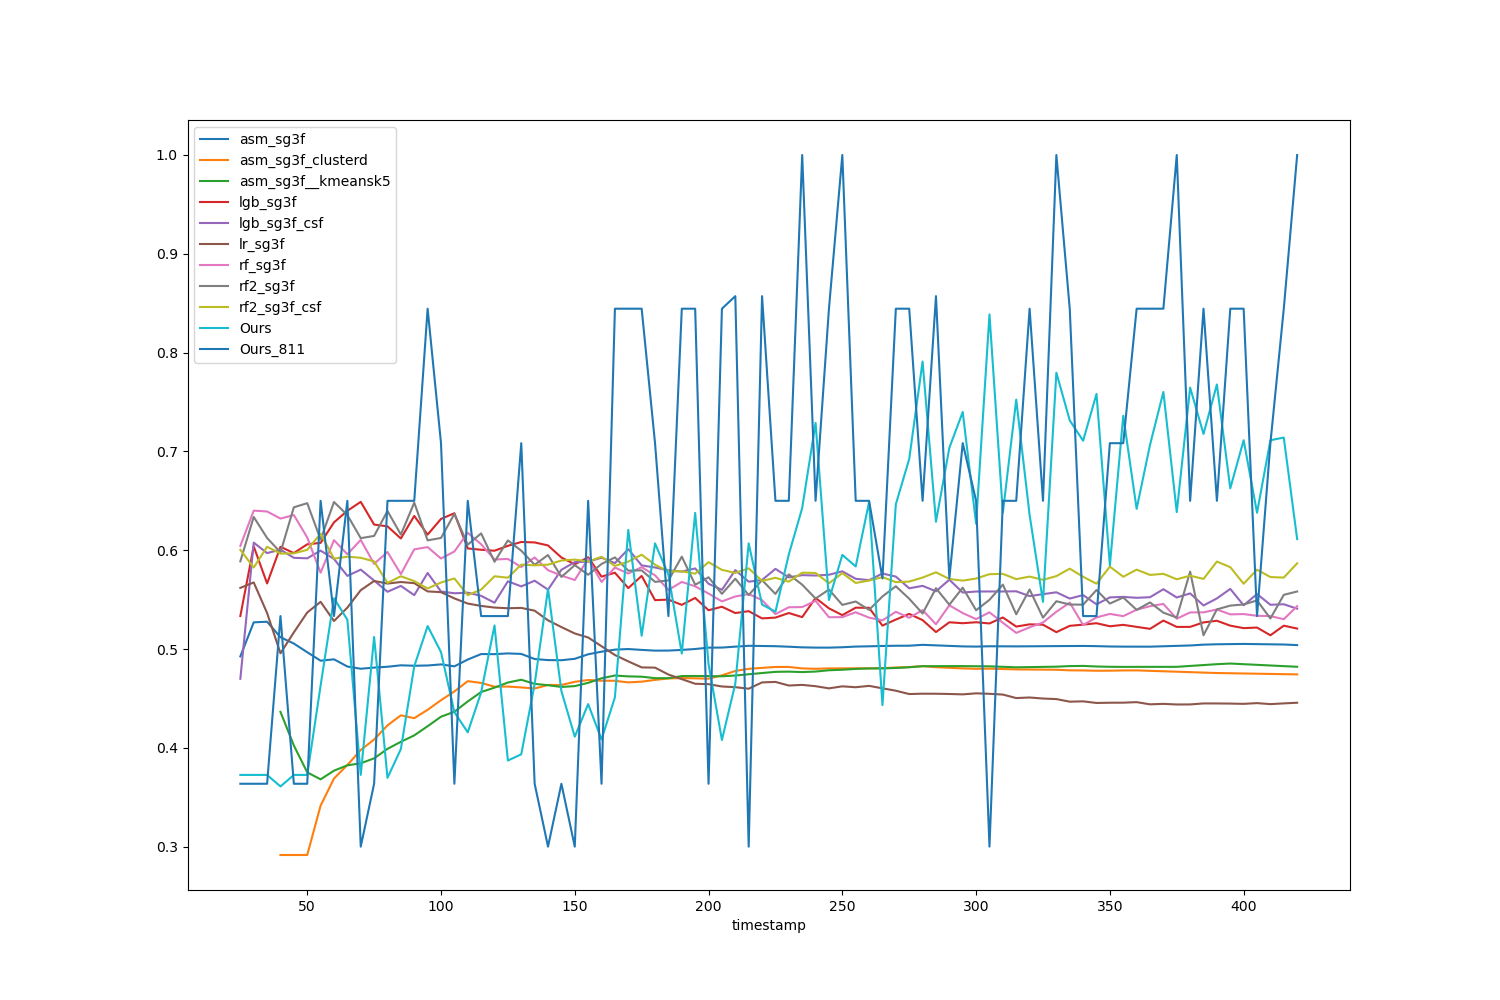

In [8]:
final_df.plot.line(figsize=(15,10))

## 10 fold experiment

asm_sg3f_10fold_test 27.84429232804233
asm_sk10f_spectralg55k5_test 27.96734788359788
asm_sk10f_spectralg55k10_test 28.0819246031746
asm_sk10f_spectralg55k20_test 28.15021825396825
           asm_sg3f_10fold_test  asm_sk10f_spectralg55k5_test  \
timestamp                                                       
40.0                   0.795595                      0.795595   
45.0                   0.838135                      0.838135   
50.0                   0.848849                      0.848849   
55.0                   0.857183                      0.857183   
60.0                   0.783929                      0.813095   
65.0                   0.853690                      0.853690   
70.0                   0.836190                      0.855595   
75.0                   0.779683                      0.796825   
80.0                   0.789087                      0.785278   
85.0                   0.832063                      0.849206   
90.0                   0.910159        

<AxesSubplot:xlabel='timestamp'>

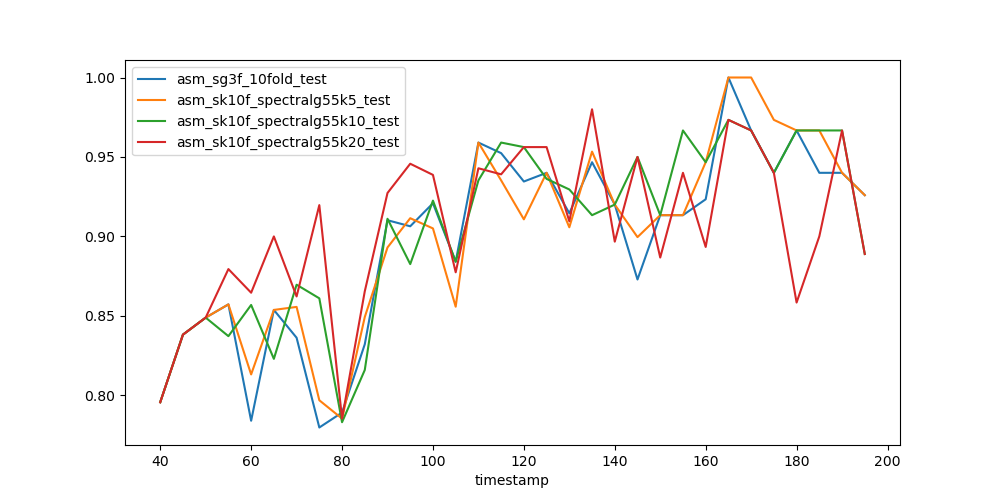

In [16]:
result_dict = {}

'''input_files = ["asm_sg3f_10fold_test.csv",
               "lgb_sg3f_10fold_test.csv",
               "lgb_sg3f_csf_10fold_test.csv",
               "lr_sg3f_10fold_test.csv",
               "lr_sg3f_csf_10fold_test.csv",
               "rf_sg3f_10fold_test.csv",
               "rf_sg3f_csf_10fold_test.csv"]'''
input_files = ["asm_sg3f_10fold_test.csv",
               "asm_sk10f_spectralg55k5_test.csv",
               "asm_sk10f_spectralg55k10_test.csv",
               "asm_sk10f_spectralg55k20_test.csv"]
'''model_name_dict = {
    "asm_sg3f_10fold_test" : "ASM",
    "asm_sk10f_spectralg55k20_test" : "SGC-ASM"
}'''
for input_file in input_files:
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0).dropna()
    model_name = input_file.split(".")[0]
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        param_df = param_df[(param_df.index > 39) & (param_df.index < 196)]
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
            print(model_name, curve_area)
    result_df = pd.DataFrame.from_dict(result_dict)
#result_df.rename(columns=model_name_dict, inplace=True)
print(result_df)
result_df.plot.line(figsize=(10,5))

In [10]:
exp_log_path = "/raid/home/smelo/PingUMiL-pytorch/experiment_log/winpred_winpred_binary_activity_gs_macro_high_cls_epochs_t8v1t1_valonf1"
files = glob.glob(exp_log_path+"/*/*.csv", recursive=True)
exp_dict = {"timestamp" : [], "f1_test" : []}
print(len(files))
for file in files:
    df = pd.read_csv(file)
    exp_dict["f1_test"].append(df['f1_test'].mean())
    exp_dict["timestamp"].append(df['timestamp'][0])
print(exp_dict)
exp_df = pd.DataFrame.from_dict(exp_dict).sort_values(by="timestamp").rename(columns={"f1_test" : "Ours_811"}).set_index("timestamp")
print(exp_df)
final_df = result_df.merge(exp_df, on="timestamp", how="right")


119
{'timestamp': [570, 65, 255, 500, 415, 60, 105, 460, 535, 260, 90, 140, 70, 80, 495, 355, 515, 310, 575, 275, 150, 340, 445, 335, 285, 130, 560, 265, 430, 75, 610, 225, 50, 120, 475, 605, 145, 190, 100, 380, 35, 305, 405, 530, 470, 295, 540, 520, 45, 85, 325, 230, 175, 125, 505, 400, 220, 550, 395, 585, 200, 555, 365, 320, 245, 545, 185, 465, 480, 280, 195, 30, 155, 240, 350, 250, 345, 385, 110, 510, 425, 590, 580, 360, 20, 525, 440, 600, 565, 40, 490, 180, 390, 300, 315, 485, 290, 205, 55, 450, 95, 410, 115, 435, 420, 160, 165, 25, 135, 595, 235, 215, 210, 270, 370, 330, 455, 375, 170], 'f1_test': [0.8008333333333335, 0.37257575757575756, 0.6941666666666666, 0.7593253968253968, 0.7562878787878788, 0.37257575757575756, 0.5162878787878789, 0.7632142857142857, 0.7114862914862916, 0.8507142857142858, 0.682950937950938, 0.6035606060606061, 0.4590151515151515, 0.5403282828282829, 0.7969444444444446, 0.8416666666666668, 0.8046428571428572, 0.7854545454545455, 0.8532539682539685, 0.793055

<Figure size 432x288 with 0 Axes>

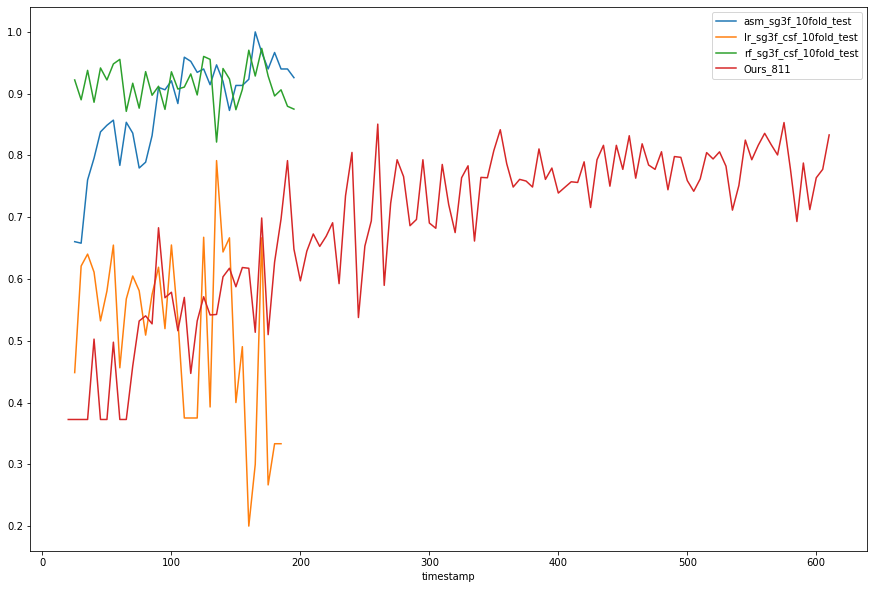

In [19]:
plt.figure()
plot_fig = final_df.plot.line(figsize=(15,10)).get_figure()
plot_fig.savefig("10fold_valonf1.png", bbox_inches='tight')


In [11]:
exp_log_path = "/raid/home/smelo/PingUMiL-pytorch/experiment_log/winpred_winpred_binary_activity_gs_macro_high_cls_epochs_allts_t8v1t1_valonf1"
files = glob.glob(exp_log_path+"/*/*.csv", recursive=True)
exp_dict = {"timestamp" : [], "f1_test" : []}
print(len(files))
for file in files:
    df = pd.read_csv(file)
    exp_dict["f1_test"].append(df['f1_test'].mean())
    exp_dict["timestamp"].append(df['timestamp'][0])
print(exp_dict)
exp_df = pd.DataFrame.from_dict(exp_dict).sort_values(by="timestamp").rename(columns={"f1_test" : "Ours_allts_811"}).set_index("timestamp")
print(exp_df)
final2_df = final_df.merge(exp_df, on="timestamp", how="right")


119
{'timestamp': [470, 275, 240, 165, 340, 450, 110, 155, 385, 525, 215, 70, 405, 420, 475, 355, 125, 515, 175, 85, 390, 220, 445, 305, 605, 490, 205, 520, 580, 600, 430, 345, 550, 590, 285, 75, 230, 150, 400, 370, 585, 250, 310, 365, 510, 350, 610, 380, 50, 360, 25, 115, 30, 170, 535, 255, 440, 330, 120, 160, 295, 555, 320, 415, 20, 570, 425, 375, 500, 595, 565, 80, 260, 485, 65, 290, 40, 315, 140, 100, 145, 560, 225, 435, 530, 245, 35, 280, 495, 55, 235, 195, 395, 180, 300, 45, 455, 190, 540, 545, 465, 270, 90, 185, 460, 480, 265, 335, 505, 210, 135, 60, 130, 575, 325, 105, 200, 95, 410], 'f1_test': [0.6951767676767677, 0.7300974025974027, 0.7250000000000002, 0.5182323232323233, 0.6465656565656566, 0.7068434343434344, 0.5613636363636363, 0.5535353535353535, 0.7280555555555555, 0.7455555555555555, 0.6212878787878788, 0.611919191919192, 0.7446212121212122, 0.7217243867243869, 0.7165656565656565, 0.7757323232323232, 0.5120454545454545, 0.7126767676767678, 0.5959595959595959, 0.53603535

In [39]:
ax = final2_df.plot(title="All models")
fig = ax.get_figure()
fig.savefig("10fold_valonf1_allts.png")


<IPython.core.display.Javascript object>

In [40]:
ax = final2_df[["Ours_811","Ours_allts_811"]].plot(title="Data")
fig = ax.get_figure()
fig.savefig("compare_ours.png")

<IPython.core.display.Javascript object>

Train Test + Cluster

In [ ]:
result_dict = {}
input_files = ["asm_sg3f.csv", "asm_sg3f_clusterd.csv", "lgb_sg3f.csv", "lgb_sg3f_csf.csv", "lr_sg3f.csv", "lr_sg3f_csf.csv", "rf_sg3f.csv", "rf_sg3f_csf.csv", "rf2_sg3f.csv", "rf2_sg3f_csf.csv"]
for input_file in input_files:
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    model_name = input_file.split(".")[0]
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
    result_df = pd.DataFrame.from_dict(result_dict)
print(result_df)
result_df.plot.line(figsize=(10,5))